### 1. Environment set
________

* path to pkg

* import

* check HyperbolicTD and test HyperbolicGW, HyperAnalysis

In [16]:
import os
print("Current working directory:", os.getcwd())
import sys
sys.path.append('/Users/sologaes/Desktop/project_log/pro_hyp')

Current working directory: /Users/sologaes/Desktop/project_log/pro_hyp


In [62]:
%reload_ext autoreload
%autoreload 2
import time
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm
from lib.hyp_wav import HyperbolicGW, HyperAnalysis, detector_ALIGO, detector_ETD, detector_CE2
from lib.hyp_wav import snr_b, snr_e, snr_e_sd, snr_be, wrapper_snr_b_sd, wrapper_snr_be
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
            "font.family": 'serif',
            "font.size": 12,
            "mathtext.fontset": 'stix',
            "font.serif": ['Times New Roman'],
            'axes.unicode_minus': False
         }
rcParams.update(config)

In [48]:
approximants = td_approximants()
def check_hyperbolic():   
    if "HyperbolicTD" in approximants:
        print("true")

check_hyperbolic()

true


### 2. SNR relation
_______

* SNR vs. b or e without errbar

* SNR vs. b or e with errbar

In [43]:
b_values = np.arange(70, 301, 1)
e_values = np.arange(1.05, 1.51, 0.01)
snr_b_aligo, valid_b_aligo, error_b_aligo = snr_b(b_values, "aligo", ecc=1.1)
snr_b_et, valid_b_et, error_b_et = snr_b(b_values, "et", ecc=1.1)
snr_b_ce, valid_b_ce, error_b_ce = snr_b(b_values, "ce", ecc=1.1)
snr_e_aligo, valid_e_aligo, error_e_aligo = snr_e(e_values, "aligo", b = 100)
snr_e_et, valid_e_et, error_e_et = snr_e(e_values, "et", b = 100)
snr_e_ce, valid_e_ce, error_e_ce = snr_e(e_values, "ce", b = 100)

Progress: 10 out of 46 ecc values calculated.
Estimated time remaining: 5.08 seconds
Progress: 20 out of 46 ecc values calculated.
Estimated time remaining: 3.92 seconds
Progress: 30 out of 46 ecc values calculated.
Estimated time remaining: 2.64 seconds
Progress: 40 out of 46 ecc values calculated.
Estimated time remaining: 0.98 seconds


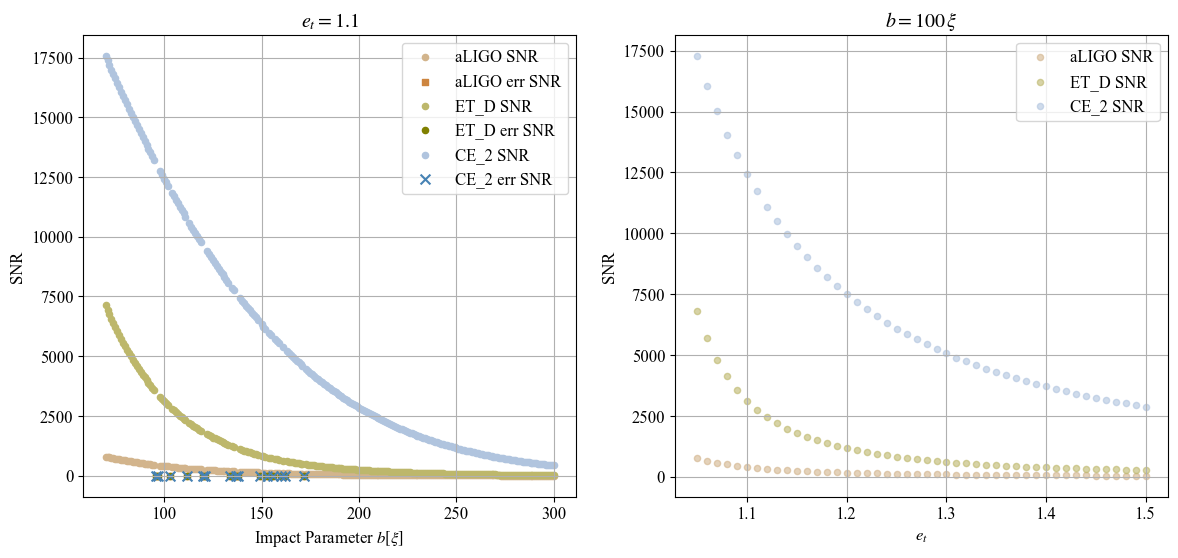

In [50]:
%matplotlib inline
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(valid_b_aligo, snr_b_aligo, marker='o', s=20, color = "tan", label='aLIGO SNR')
if error_b_aligo:
    plt.scatter(error_b_aligo, [0]*len(error_b_aligo), color='peru', marker='s', s=20, label='aLIGO err SNR')

plt.scatter(valid_b_et, snr_b_et, marker='o', s=20, color = "darkkhaki", label='ET_D SNR')
if error_b_et:
    plt.scatter(error_b_et, [0]*len(error_b_et), color='olive', marker='o', s=20, label='ET_D err SNR')

plt.scatter(valid_b_ce, snr_b_ce, marker='o', s=20, color = "lightsteelblue", label='CE_2 SNR')
if error_b_ce:
    plt.scatter(error_b_ce, [0]*len(error_b_ce), color='steelblue', marker='x', s=50, label='CE_2 err SNR')
plt.xlabel(r'Impact Parameter $b [\xi]$ ')
plt.ylabel('SNR')
plt.title(r'$e_{t} = 1.1$')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(valid_e_aligo, snr_e_aligo, marker='o', s=20, alpha = 0.6, color = "tan", label='aLIGO SNR')
plt.scatter(valid_e_et, snr_e_et, marker='o', s=20, alpha = 0.6, color = "darkkhaki", label='ET_D SNR')
plt.scatter(valid_e_ce, snr_e_ce, marker='o', s=20, alpha = 0.6, color = "lightsteelblue", label='CE_2 SNR')
plt.xlabel(r'$e_{t}$')
plt.ylabel('SNR')
plt.title(r'$b =100 \,\xi$')
plt.legend()
plt.grid(True)

plt.savefig('./output_fig/snr_vs_b.png', dpi=300, bbox_inches='tight')
plt.show()


In [38]:
b_list = np.arange(70, 301, 5)
e_list = np.arange(1.05, 1.51, 0.01)
np.random.seed(42)
seed_list = np.random.choice(range(1000), size=10, replace=False)
seed_list

array([521, 737, 740, 660, 411, 678, 626, 513, 859, 136])

In [52]:
valid_b, snr_b_mean_aligo, snr_b_sd_aligo = wrapper_snr_b_sd("aligo", b_list, seed_list, e=1.1)
valid_b, snr_b_mean_et, snr_b_sd_et = wrapper_snr_b_sd("et", b_list, seed_list, e=1.1)
valid_b, snr_b_mean_ce, snr_b_sd_ce = wrapper_snr_b_sd("ce", b_list, seed_list, e=1.1)
snr_e_mean_aligo, snr_e_sd_aligo = snr_e_sd("aligo", e_list, seed_list, b=100)
snr_e_mean_et, snr_e_sd_et = snr_e_sd("et", e_list, seed_list, b=100)
snr_e_mean_ce, snr_e_sd_ce = snr_e_sd("ce", e_list, seed_list, b=100)

Progress: 1 out of 47 b values processed.
Progress: 2 out of 47 b values processed.
Progress: 3 out of 47 b values processed.
Progress: 4 out of 47 b values processed.
Progress: 5 out of 47 b values processed.
Progress: 6 out of 47 b values processed.
Progress: 7 out of 47 b values processed.
Progress: 8 out of 47 b values processed.


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument
No valid SNR values for b = 120. Skipping this b value.
Progress: 9 out of 47 b values processed.
Progress: 10 out of 47 b values processed.
Progress: 11 out of 47 b values processed.
Progress: 12 out of 47 b values processed.
Progress: 13 out of 47 b values processed.
Progress: 14 out of 47 b values processed.
Progress: 15 out of 47 b values processed.


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument
Progress: 16 out of 47 b values processed.


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument
No valid SNR values for b = 160. Skipping this b value.
Progress: 17 out of 47 b values processed.
Progress: 18 out of 47 b values processed.
Progress: 19 out of 47 b values processed.
Progress: 20 out of 47 b values processed.
Progress: 21 out of 47 b values processed.
Progress: 22 out of 47 b values processed.
Progress: 23 out of 47 b values processed.
Progress: 24 out of 47 b values processed.
Progress: 25 out of 47 b values processed.
Progress: 26 out of 47 b values processed.
Progress: 27 out of 47 b values processed.
Progress: 28 out of 47 b values processed.
Progress: 29 out of 47 b values processed.
Progress: 30 out of 47 b values processed.
Progress: 31 out of 47 b values processed.
Progress: 32 out of 47 b values processed.
Progress: 33 out of 47 b values processed.
Progress: 34 out of 47 b values processed.
Progress: 35 out of 47 b values processed.
Progress: 36 out of 47 b values processed.
Progress: 37 out of

XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument
Progress: 8 out of 47 b values processed.


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument
No valid SNR values for b = 120. Skipping this b value.
Progress: 9 out of 47 b values processed.
Progress: 10 out of 47 b values processed.
Progress: 11 out of 47 b values processed.
Progress: 12 out of 47 b values processed.
Progress: 13 out of 47 b values processed.
Progress: 14 out of 47 b values processed.
Progress: 15 out of 47 b values processed.


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument
Progress: 16 out of 47 b values processed.


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument
No valid SNR values for b = 160. Skipping this b value.
Progress: 17 out of 47 b values processed.
Progress: 18 out of 47 b values processed.
Progress: 19 out of 47 b values processed.
Progress: 20 out of 47 b values processed.
Progress: 21 out of 47 b values processed.
Progress: 22 out of 47 b values processed.
Progress: 23 out of 47 b values processed.
Progress: 24 out of 47 b values processed.
Progress: 25 out of 47 b values processed.
Progress: 26 out of 47 b values processed.
Progress: 27 out of 47 b values processed.
Progress: 28 out of 47 b values processed.
Progress: 29 out of 47 b values processed.
Progress: 30 out of 47 b values processed.
Progress: 31 out of 47 b values processed.
Progress: 32 out of 47 b values processed.
Progress: 33 out of 47 b values processed.
Progress: 34 out of 47 b values processed.
Progress: 35 out of 47 b values processed.
Progress: 36 out of 47 b values processed.
Progress: 37 out of

XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.0, e=1.1: Invalid argument
No valid SNR values for b = 120. Skipping this b value.
Progress: 9 out of 47 b values processed.
Progress: 10 out of 47 b values processed.
Progress: 11 out of 47 b values processed.
Progress: 12 out of 47 b values processed.
Progress: 13 out of 47 b values processed.
Progress: 14 out of 47 b values processed.
Progress: 15 out of 47 b values processed.
Progress: 16 out of 47 b values processed.


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=159.99999999999997, e=1.1: Invalid argument
No valid SNR values for b = 160. Skipping this b value.
Progress: 17 out of 47 b values processed.
Progress: 18 out of 47 b values processed.
Progress: 19 out of 47 b values processed.
Progress: 20 out of 47 b values processed.
Progress: 21 out of 47 b values processed.
Progress: 22 out of 47 b values processed.
Progress: 23 out of 47 b values processed.
Progress: 24 out of 47 b values processed.
Progress: 25 out of 47 b values processed.
Progress: 26 out of 47 b values processed.
Progress: 27 out of 47 b values processed.
Progress: 28 out of 47 b values processed.
Progress: 29 out of 47 b values processed.
Progress: 30 out of 47 b values processed.
Progress: 31 out of 47 b values processed.
Progress: 32 out of 47 b values processed.
Progress: 33 out of 47 b values processed.
Progress: 34 out of 47 b values processed.
Progress: 35 out of 47 b values processed.
Progress: 36 out of 47 b values processed.
Progress: 37 out of

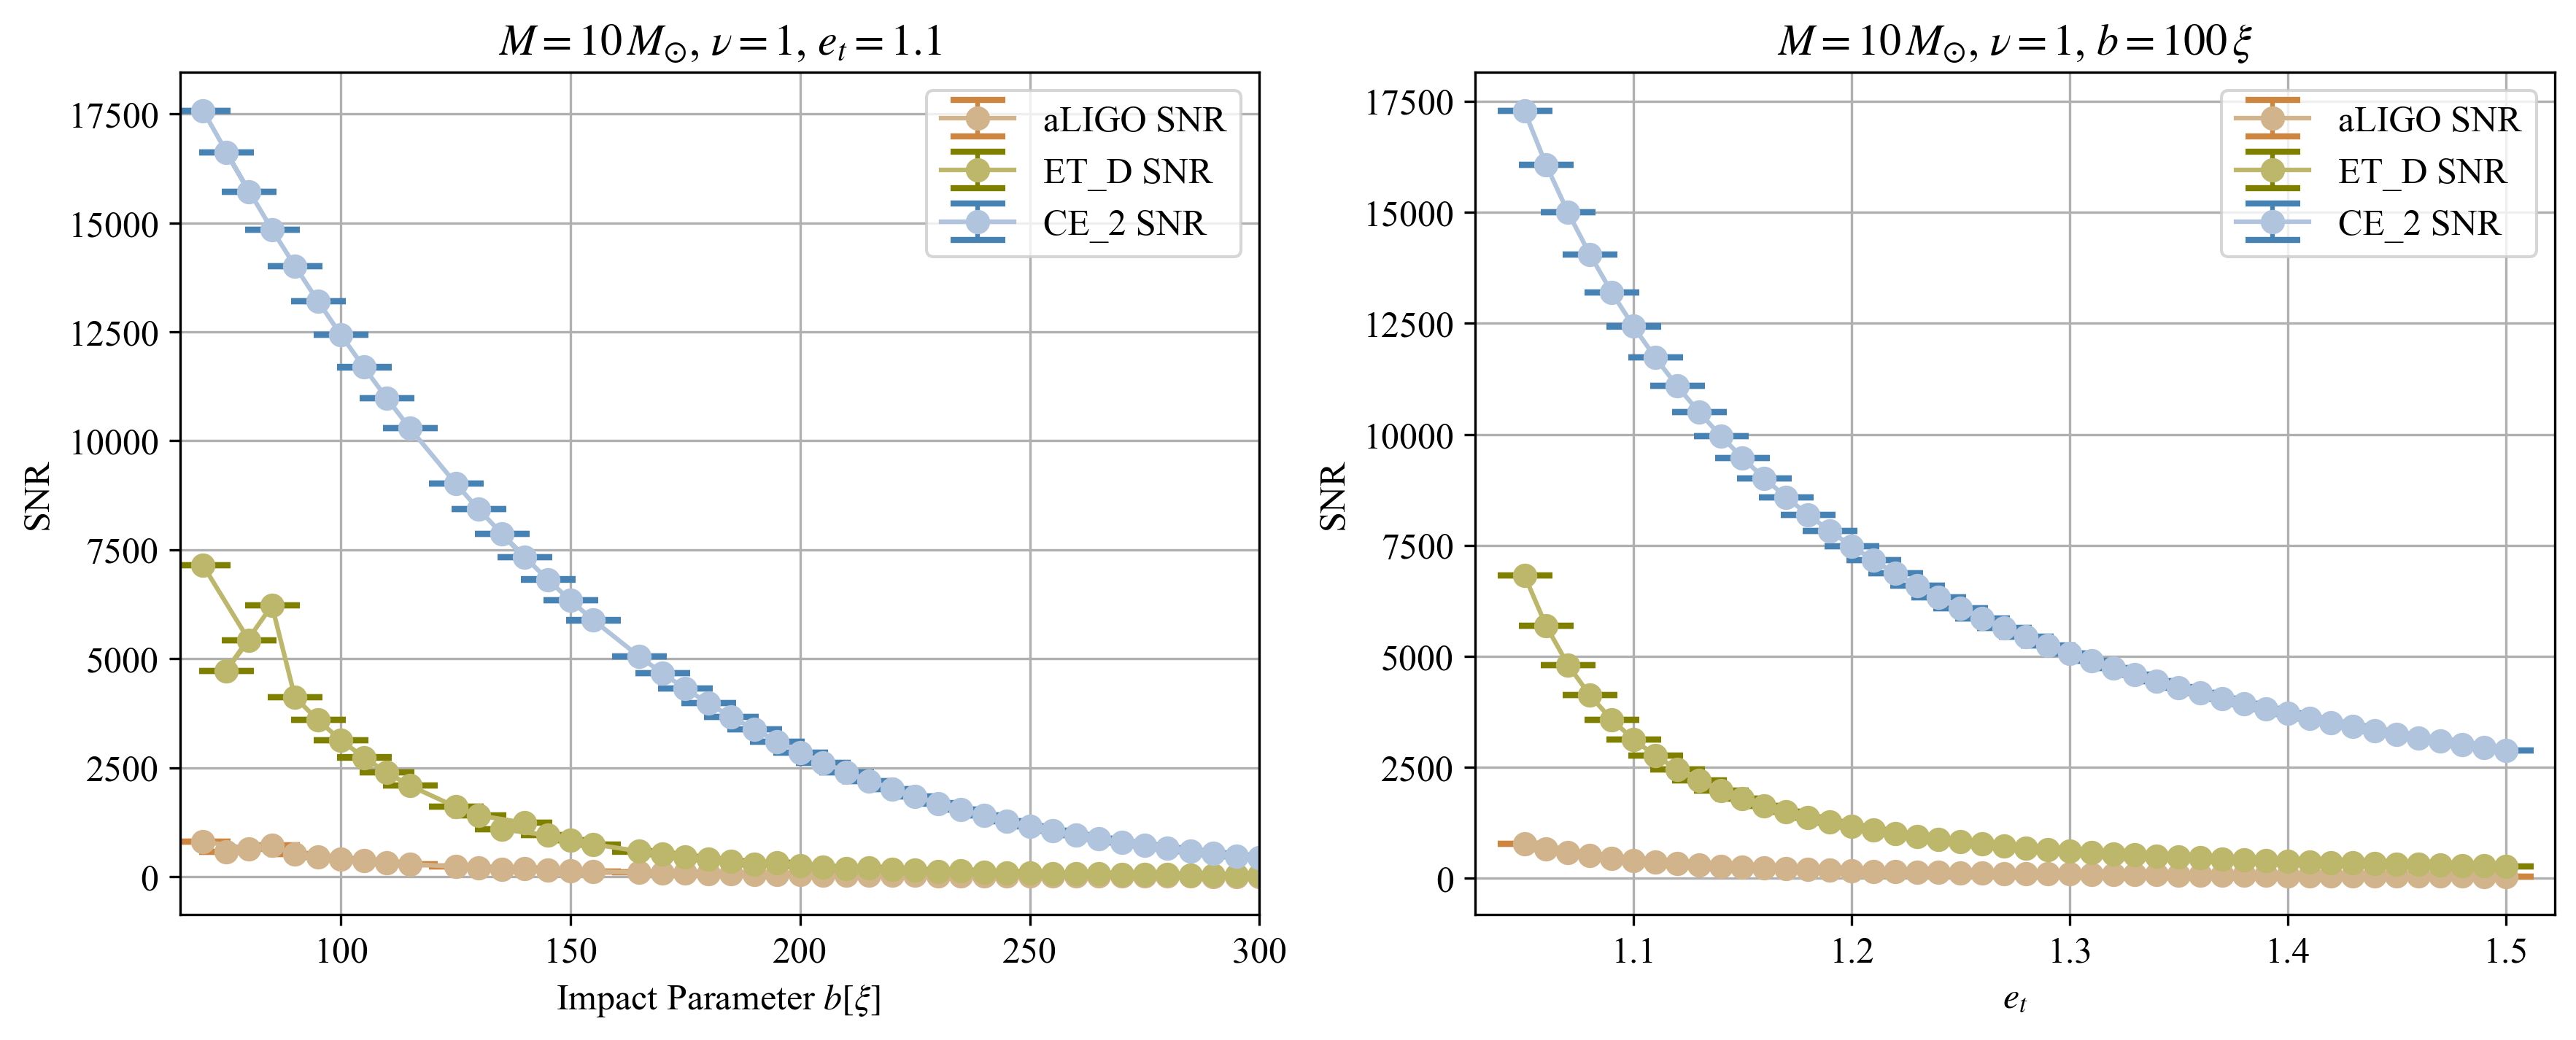

In [54]:
plt.figure(figsize=(14, 5), dpi =300)

plt.subplot(1, 2, 1)
plt.errorbar(valid_b, snr_b_mean_aligo, yerr=snr_b_sd_aligo, xerr = None, fmt='o', ecolor='peru',
             capsize=9, capthick=2, markersize=7, linestyle='-', color='tan', label='aLIGO SNR')
plt.errorbar(valid_b, snr_b_mean_et, yerr=snr_b_sd_et, xerr = None, fmt='o', ecolor='olive',
             capsize=9, capthick=2, markersize=7, linestyle='-', color='darkkhaki', label='ET_D SNR')
plt.errorbar(valid_b, snr_b_mean_ce, yerr=snr_b_sd_ce, xerr = None, fmt='o', ecolor='steelblue',
             capsize=9, capthick=2, markersize=7, linestyle='-', color='lightsteelblue', label='CE_2 SNR')
plt.xlim(65,300)
plt.xlabel(r'Impact Parameter $b [\xi]$ ')
plt.ylabel('SNR')
plt.title(r'$M = 10\, M_{\odot}$, $\nu =1$, $e_{t} = 1.1$')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.errorbar(e_list, snr_e_mean_aligo, yerr=snr_e_sd_aligo, xerr = None, fmt='o', ecolor='peru',
             capsize=9, capthick=2, markersize=7, linestyle='-', color='tan', label='aLIGO SNR')
plt.errorbar(e_list, snr_e_mean_et, yerr=snr_e_sd_et, xerr = None, fmt='o', ecolor='olive',
             capsize=9, capthick=2, markersize=7, linestyle='-', color='darkkhaki', label='ET_D SNR')
plt.errorbar(e_list, snr_e_mean_ce, yerr=snr_e_sd_ce, xerr = None, fmt='o', ecolor='steelblue',
             capsize=9, capthick=2, markersize=7, linestyle='-', color='lightsteelblue', label='CE_2 SNR')
plt.xlabel(r'$e_{t}$')
plt.ylabel('SNR')
plt.title(r'$M = 10\, M_{\odot}$, $\nu =1$, $b =100 \,\xi$')
plt.legend()
plt.grid(True)

plt.savefig('./output_fig/snr_vs_b_err.png', dpi=300, bbox_inches='tight')
plt.show()

### 3. SNR distribution

____

In [57]:
num_samples = 1000
b_min = 70
b_max = 300
e_min = 1.05
e_max = 1.5

In [64]:
data = np.loadtxt('./src/samples.csv', delimiter=',', skiprows=1)
b_samples, e_samples = data[:, 0], data[:, 1]

In [66]:
params = list(zip(b_samples, e_samples))
total_tasks = len(params)
snr_values = []
valid_b_samples = []
valid_e_samples = []

start_time = time.time()
with ProcessPoolExecutor() as executor:
    with tqdm(total=total_tasks) as pbar:
        for i, (snr, b, e) in enumerate(executor.map(wrapper_snr_be, params)):
            if snr is not None:
                snr_values.append(snr)
                valid_b_samples.append(b)
                valid_e_samples.append(e)
            if (i + 1) % 100 == 0:
                pbar.update(100)

end_time = time.time()
elapsed_time = end_time - start_time

  0%|                                                        | 0/1000 [00:00<?, ?it/s]XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=273.0083152775375, e=1.4944506035984912: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=104.65847547362443, e=1.4619697339146187: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=90.2035775534008, e=1.4659782879194387: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=87.32512988756842, e=1.4486899867062841: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=120.5119099739878, e=1.4415444932554184: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=122.87438679719196, e=1.2807098299574289: Invalid argument


 10%|████▌                                         | 100/1000 [00:09<01:22, 10.87it/s]XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=84.89087131090585, e=1.3632092781242064: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=116.22877025535095, e=1.433043111321946: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=135.86107481133857, e=1.1079914403630504: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=136.1089477759661, e=1.200803484416614: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=118.79721373953222, e=1.3845787153312235: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=85.93386494566293, e=1.3686774398903767: Invalid argument


 20%|█████████▏                                    | 200/1000 [00:20<01:21,  9.78it/s]XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=124.04820966574333, e=1.1179760513014052: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=234.42421273437853, e=1.3969148300898233: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=115.13710334300629, e=1.266228126266023: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=151.57243601999681, e=1.114122994305681: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=125.75184063545106, e=1.1969075887097964: Invalid argument


 30%|█████████████▊                                | 300/1000 [00:30<01:11,  9.73it/s]XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=118.11791937304739, e=1.4712955108096604: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=132.61386945561563, e=1.241472000501634: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=113.95785024696889, e=1.4401641732551018: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=251.60821386132784, e=1.3799008600868765: Invalid argument


 40%|██████████████████▍                           | 400/1000 [00:40<01:01,  9.73it/s]XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=95.7637984868316, e=1.3376039720169752: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=103.74010860618513, e=1.4410072430154233: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=84.48223910426451, e=1.4418390526517666: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=267.65634621729146, e=1.402073467826223: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=121.65907200348997, e=1.393028310649477: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=133.44389901243096, e=1.2179633062332031: Invalid argument


 50%|███████████████████████                       | 500/1000 [00:50<00:50,  9.92it/s]XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=100.10302525800608, e=1.3503974546811617: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=115.52272375726618, e=1.3139738084289634: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=108.02537148154038, e=1.154376193252189: Invalid argument


 60%|███████████████████████████▌                  | 600/1000 [00:59<00:38, 10.40it/s]XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=92.95252052453705, e=1.4289149824693896: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=138.66966380368214, e=1.2286416826834277: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=96.28709927979844, e=1.3202674500122777: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=124.60757409236213, e=1.4652407357310275: Invalid argument


 70%|████████████████████████████████▏             | 700/1000 [01:07<00:27, 10.72it/s]XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=109.63911798935689, e=1.4013427137307979: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=162.10927239935327, e=1.095470614954791: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=134.2494164550843, e=1.1116993675780495: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=84.92665886122684, e=1.3596606177389439: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=95.24244853324089, e=1.336740664563726: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=150.24650030201323, e=1.0820655274943665: Invalid argument


 80%|████████████████████████████████████▊         | 800/1000 [01:17<00:18, 10.80it/s]XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=103.1195396015486, e=1.3454153732991763: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=126.15288763444546, e=1.4676376381467224: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=107.28321861971325, e=1.3452728269564822: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=105.72710208945416, e=1.2952621135036222: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=101.04679864174378, e=1.4931013827860287: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=156.85852040662581, e=1.0946301448142473: Invalid argument


 90%|█████████████████████████████████████████▍    | 900/1000 [01:26<00:09, 10.60it/s]XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=102.02330678916812, e=1.2157392887280818: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=90.41090128320934, e=1.4487881012092836: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=142.81676083085523, e=1.1492753787200451: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=103.10149966907765, e=1.4992563801268273: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=155.9952984354951, e=1.1330143139101378: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=123.72815358181589, e=1.2005300799338694: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=86.30342730538942, e=1.2465828161768309: Invalid argument


XLAL Error - XLALSimNoise (LALSimNoise.c:162): Invalid argument


Error occurred for b=106.3729168263934, e=1.1769841836119401: Invalid argument


100%|█████████████████████████████████████████████| 1000/1000 [01:36<00:00, 10.41it/s]


In [67]:
snr_values = np.array(snr_values)
valid_b_samples = np.array(valid_b_samples)
valid_e_samples = np.array(valid_e_samples)
print(f"Total time elapsed: {elapsed_time:.2f} seconds")
print(f"{len(snr_values)} out of {num_samples} valid (b,e) be calculated.")

Total time elapsed: 96.12 seconds
946 out of 1000 valid (b,e) be calculated.


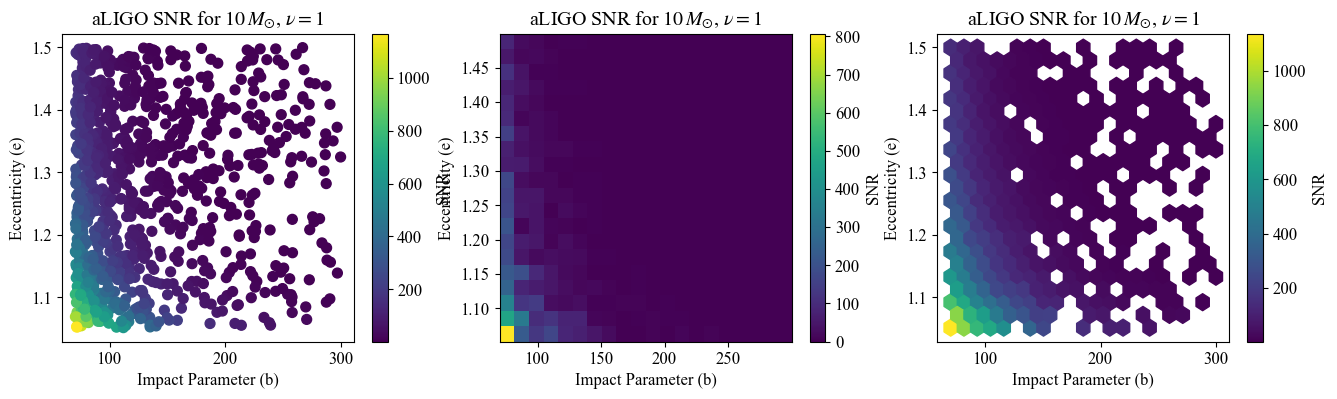

In [70]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
scatter = plt.scatter(valid_b_samples, valid_e_samples, c=snr_values, cmap='viridis', s=50)
plt.colorbar(scatter, label='SNR')
plt.xlabel('Impact Parameter (b)')
plt.ylabel('Eccentricity (e)')
plt.title(r'aLIGO SNR for $10\, M_{\odot}$, $\nu = 1$')

plt.subplot(1, 3, 2)
plt.hist2d(valid_b_samples, valid_e_samples, bins=20, cmap='viridis', weights=snr_values/20)
plt.colorbar(label='SNR')
plt.xlabel('Impact Parameter (b)')
plt.ylabel('Eccentricity (e)')
plt.title(r'aLIGO SNR for $10\, M_{\odot}$, $\nu = 1$')

plt.subplot(1, 3, 3)
hb = plt.hexbin(valid_b_samples, valid_e_samples, gridsize=20, cmap='viridis', C=snr_values, reduce_C_function=np.mean)
plt.colorbar(hb, label='SNR')
plt.xlabel('Impact Parameter (b)')
plt.ylabel('Eccentricity (e)')
plt.title(r'aLIGO SNR for $10\, M_{\odot}$, $\nu = 1$')
plt.savefig('./output_fig/snr_distribution.png', dpi=300, bbox_inches='tight')
plt.show()